In [1]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import seaborn as sns



In [2]:
#reading data from csv file
accident_data = pd.read_csv('US_Accidents_Dec20.csv')
print("The shape of data is:",(accident_data.shape))
display(accident_data.head(3))


The shape of data is: (4232541, 49)


ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  

[3 rows x 49 columns]

In [3]:

accident_data.Source.unique()

array(['MapQuest', 'MapQuest-Bing', 'Bing'], dtype=object)

['MapQuest' 'MapQuest-Bing' 'Bing']


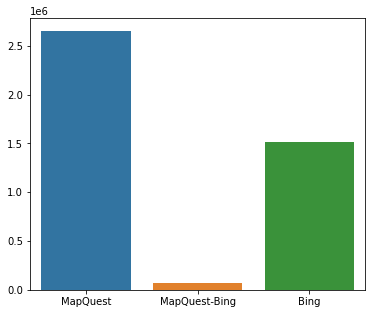

In [4]:
#plotting the graph against the resources from where data has been gathered
source = accident_data.Source.unique()
print(source)
countBySource = []
for i in accident_data.Source.unique():
    countBySource.append(accident_data[accident_data['Source']== i].count()['Source'])
fig,ax = plt.subplots(figsize=(6,5))
sns.barplot(x=source, y=countBySource)

In [5]:
# check for the datatypes for the attributes
accident_data.dtypes


ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [6]:
#check if data has some null values
accident_data.isnull().sum()


ID                             0
Source                         0
TMC                      1516064
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2716477
End_Lng                  2716477
Distance(mi)                   0
Description                    2
Number                   2687949
Street                         0
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1292
Country                        0
Timezone                    4615
Airport_Code                8973
Weather_Timestamp          62644
Temperature(F)             89900
Wind_Chill(F)            1896001
Humidity(%)                95467
Pressure(in)               76384
Visibility(mi)             98668
Wind_Direction             83611
Wind_Speed(mph)           479326
Precipitat

In [7]:
#finding categorial value columns
accident_data.select_dtypes(exclude=['int','float']).columns

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [8]:
#timezone where accident happened 
print(accident_data['Timezone'].unique())

['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']


In [40]:
accident_data.nunique()

ID                       4232541
Source                         3
TMC                           21
Severity                       4
Start_Time               3657563
End_Time                 3775982
Start_Lat                1371599
Start_Lng                1371288
End_Lat                   587824
End_Lng                   599916
Distance(mi)               14619
Description              2166721
Number                     43868
Street                    210786
Side                           3
City                       12250
County                      1752
State                         49
Zipcode                   494306
Country                        1
Timezone                       4
Airport_Code                2022
Weather_Timestamp         616787
Temperature(F)               840
Wind_Chill(F)                984
Humidity(%)                  100
Pressure(in)                1041
Visibility(mi)                87
Wind_Direction                24
Wind_Speed(mph)              162
Precipitat

In [9]:
#this will give us the total cont ofstate
state_wise_counts = accident_data.groupby('State')['ID'].count().reset_index()


In [10]:
state_wise_counts.shape


(49, 2)

In [11]:
state_wise_counts = state_wise_counts.sort_values(by = "ID",ascending=False)


In [12]:
#checking number of accidents per state
state_wise_counts.head()


State      ID
3     CA  972585
41    TX  376445
8     FL  370131
38    SC  212712
25    NC  193457

In [13]:
import seaborn as sns

sns.set(style="whitegrid")


In [14]:
states = accident_data.State.unique()

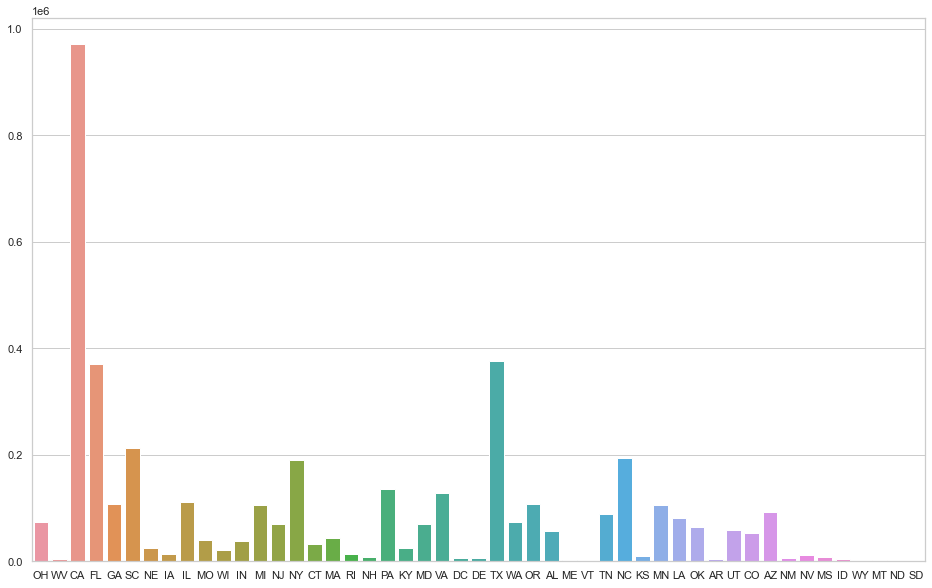

In [15]:
#plotting graph between state vs number of accindents
count_by_state=[]
for i in accident_data.State.unique():
    count_by_state.append(accident_data[accident_data['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(states,count_by_state)

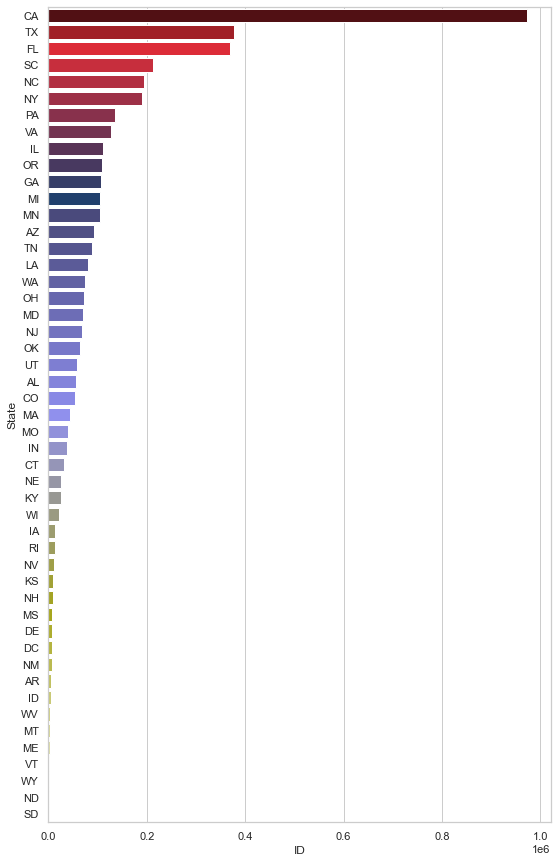

In [16]:
f, ax = plt.subplots(figsize=(9, 15))
sns.barplot(y="State", x="ID", data=state_wise_counts, palette="gist_stern")


In [17]:
#check the count of the citites
total_cities = accident_data.City.unique()
len(total_cities)

12251

In [18]:
#list cities with higher no. of accidendts
cities_accident_pone = accident_data.City.value_counts()
cities_accident_pone

Houston        114905
Los Angeles     92701
Charlotte       88887
Dallas          77303
Austin          70538
                ...  
Miller              1
Downing             1
Shawboro            1
Taylorville         1
Gunpowder           1
Name: City, Length: 12250, dtype: int64

In [19]:
most_accident_pone_cities = cities_accident_pone[:20]
most_accident_pone_cities

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

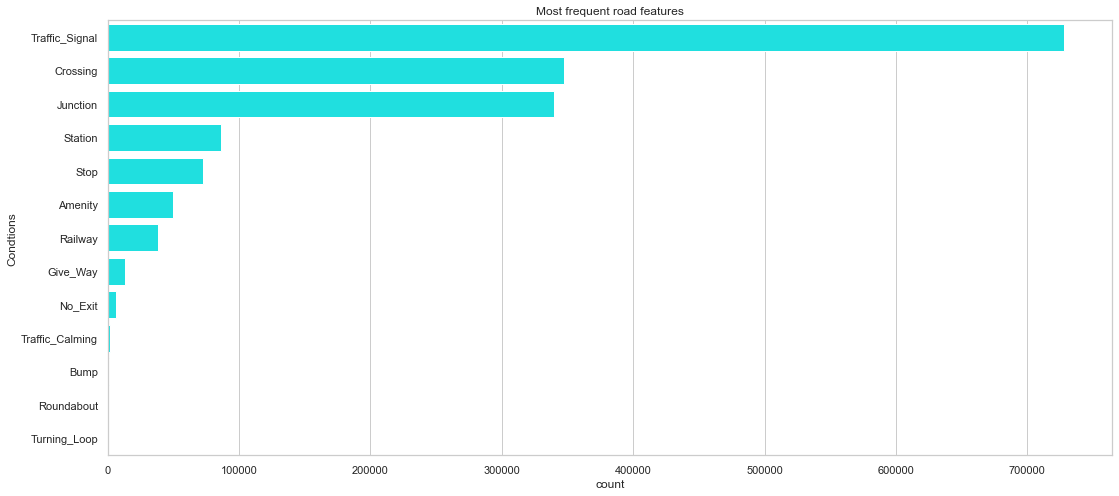

In [20]:
#analyze what were the most frequent road features during accidents
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
data = accident_data[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, color='cyan')
plt.xlabel("count")
plt.ylabel("Condtions")
plt.show()

In [21]:
#check total count of weather conditions
wc_count = accident_data.groupby('Weather_Condition').count()
wc_count

ID  Source   TMC  Severity  Start_Time  End_Time  \
Weather_Condition                                                             
Blowing Dust              106     106    28       106         106       106   
Blowing Dust / Windy      139     139    60       139         139       139   
Blowing Sand                1       1     1         1           1         1   
Blowing Snow              349     349   205       349         349       349   
Blowing Snow / Windy       82      82    19        82          82        82   
...                       ...     ...   ...       ...         ...       ...   
Volcanic Ash               22      22    18        22          22        22   
Widespread Dust           151     151   108       151         151       151   
Widespread Dust / Windy     1       1     1         1           1         1   
Wintry Mix               2497    2497  1246      2497        2497      2497   
Wintry Mix / Windy         69      69    39        69          69        69   

                         Start_Lat  Start_Lng  End_Lat  End_Lng  ...  \
Weather_Condition                                                ...   
Blowing Dust                   106        106       78       78  ...   
Blowing Dust / Windy           139        139       79       79  ...   
Blowing Sand                     1          1        0        0  ...   
Blowing Snow                   349        349      144      144  ...   
Blowing Snow / Windy            82         82       63       63  ...   
...                            ...        ...      ...      ...  ...   
Volcanic Ash                    22         22        4        4  ...   
Widespread Dust                151        151       43       43  ...   
Widespread Dust / Windy          1          1        0        0  ...   
Wintry Mix                    2497       2497     1251     1251  ...   
Wintry Mix / Windy              69         69       30       30  ...   

                         Roundabout  Station  Stop  Traffic_Calming  \
Weather_Condition                                                     
Blowing Dust                    106      106   106              106   
Blowing Dust / Windy            139      139   139              139   
Blowing Sand                      1        1     1                1   
Blowing Snow                    349      349   349              349   
Blowing Snow / Windy             82       82    82               82   
...                             ...      ...   ...              ...   
Volcanic Ash                     22       22    22               22   
Widespread Dust                 151      151   151              151   
Widespread Dust / Windy           1        1     1                1   
Wintry Mix                     2497     2497  2497             2497   
Wintry Mix / Windy               69       69    69               69   

                         Traffic_Signal  Turning_Loop  Sunrise_Sunset  \
Weather_Condition                                                       
Blowing Dust                        106           106             106   
Blowing Dust / Windy                139           139             139   
Blowing Sand                          1             1               1   
Blowing Snow                        349           349             349   
Blowing Snow / Windy                 82            82              82   
...                                 ...           ...             ...   
Volcanic Ash                         22            22              22   
Widespread Dust                     151           151             151   
Widespread Dust / Windy               1             1               1   
Wintry Mix                         2497          2497            2497   
Wintry Mix / Windy                   69            69              69   

                         Civil_Twilight  Nautical_Twilight  \
Weather_Condition                                            
Blowing Dust                        106                106   
Bl

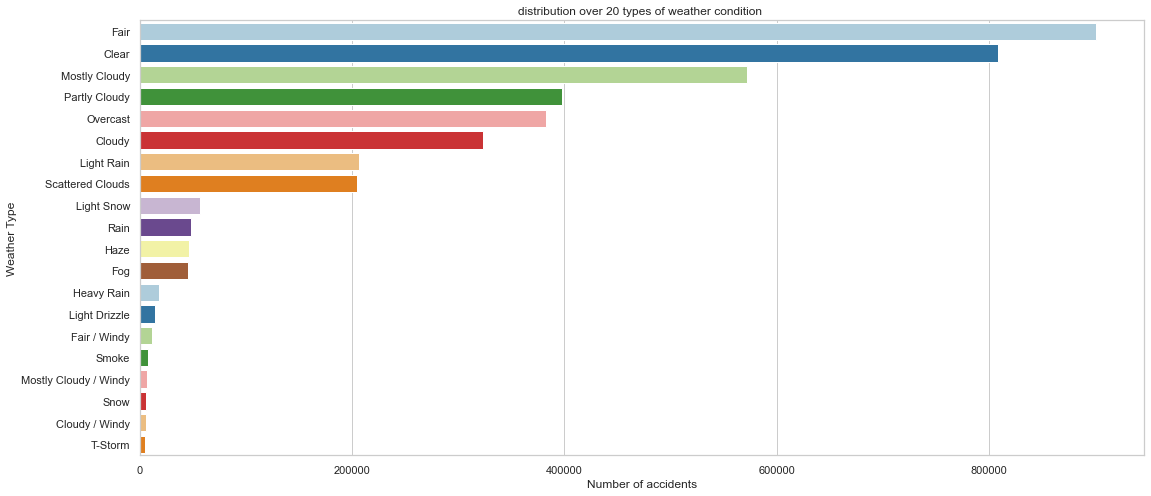

In [22]:
#checking the weather condition during accidents
weather_type = accident_data["Weather_Condition"].value_counts()[:20]
plt.figure(figsize=(18, 8))

plt.title("distribution over 20 types of weather condition ")
sns.barplot( weather_type.values, weather_type.index, palette="Paired")
plt.xlabel("Number of accidents")
plt.ylabel("Weather Type")
plt.show()


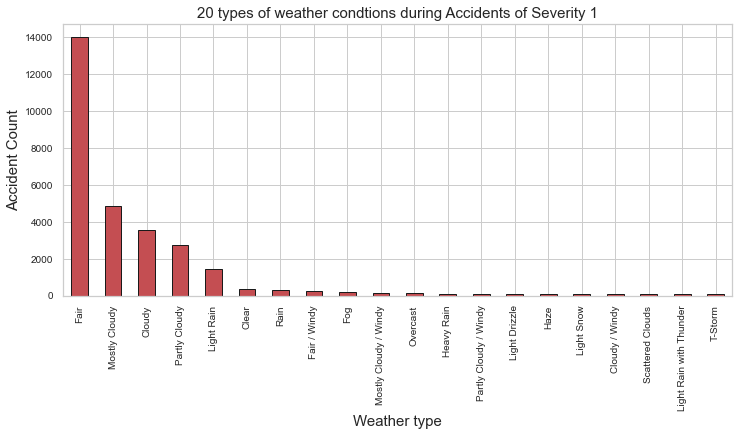

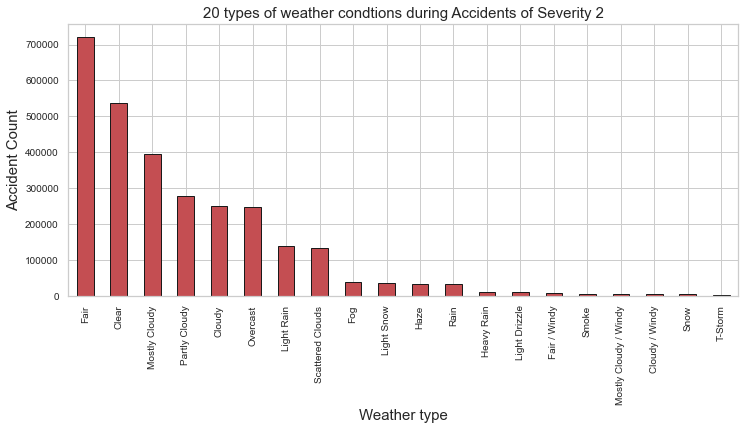

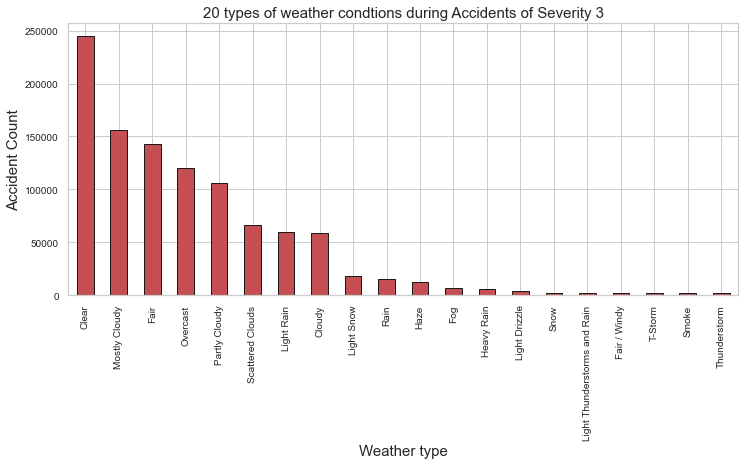

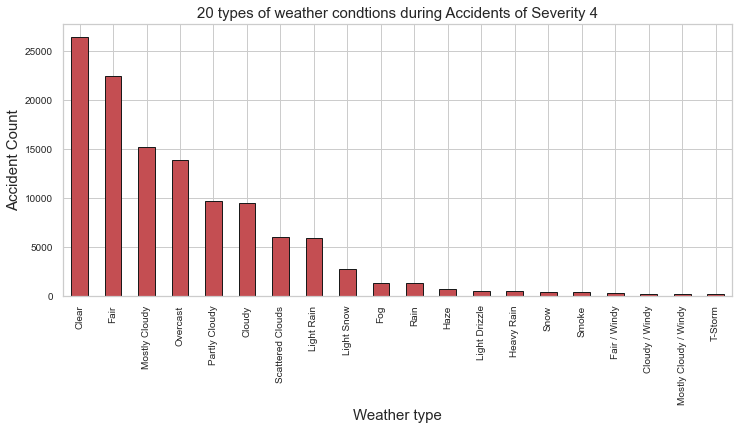

In [23]:
#plotting graph to see the weather type for diffrent levels of severity
for n in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    accident_data.loc[accident_data["Severity"] == n]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather type',fontsize=15)
    plt.ylabel('Accident Count',fontsize=15)
    plt.title('20 types of weather condtions during Accidents of Severity ' + str(n),fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

In [24]:
accident_data_time = accident_data.loc[:,['ID', 'Start_Time']]  # converting start time to date time format
accident_data_time['Start_Time'] = pd.to_datetime(accident_data_time['Start_Time'])

accident_data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 2 columns):
ID            object
Start_Time    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 64.6+ MB


[2016 2017 2020 2019 2018]


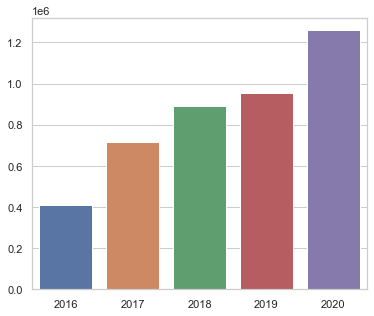

In [25]:
#checking the count of accidents per year 
accident_data_time['Year'] = accident_data_time['Start_Time'].dt.year
year = accident_data_time.Year.unique()
print(year)
countByYear= []
for i in accident_data_time.Year.unique():
    countByYear.append(accident_data_time[accident_data_time['Year']== i].count()['Year'])
fig,ax = plt.subplots(figsize=(6,5))
sns.barplot(x=year, y=countByYear)

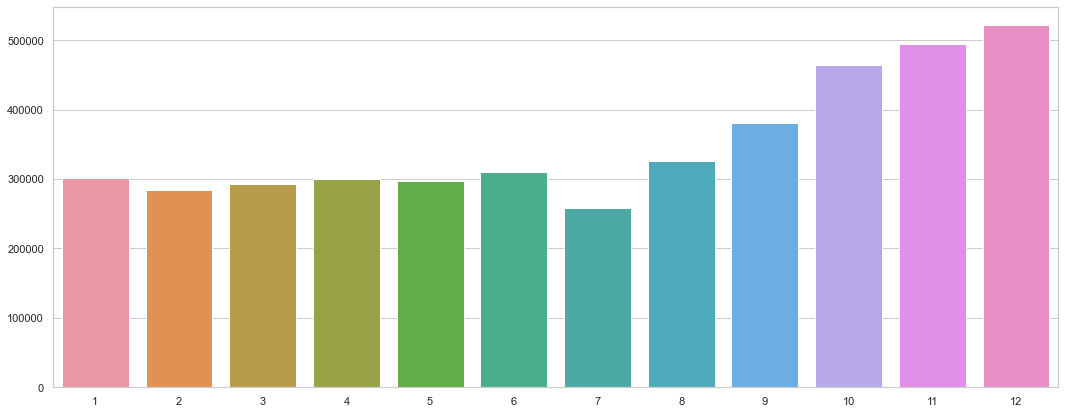

In [26]:
#checking number of accidents happenedMonthly
accident_data_time['Month'] = accident_data_time['Start_Time'].dt.month
month = accident_data_time.Month.unique()
monthlycount= []
for i in accident_data_time.Month.unique():
    monthlycount.append(accident_data_time[accident_data_time['Month']== i].count()['Month'])
fig,ax = plt.subplots(figsize=(18,7))
sns.barplot(x=month, y=monthlycount)


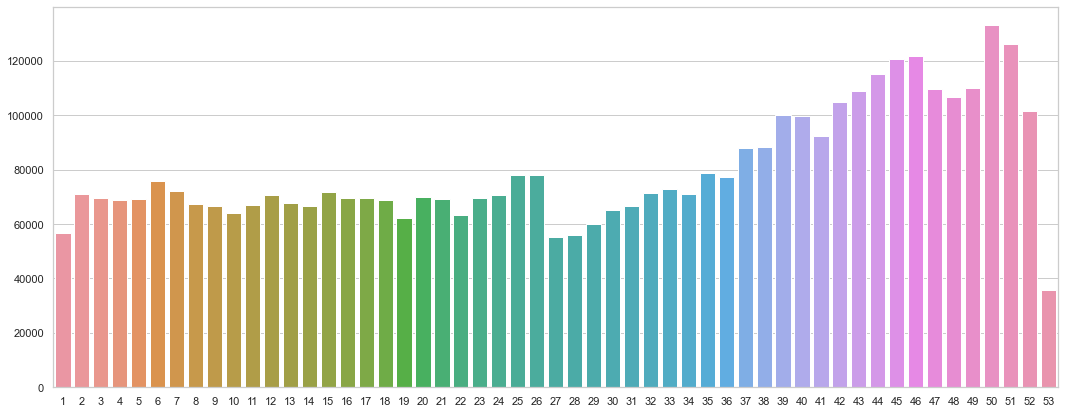

In [27]:
#checking number of accidents happened every week
accident_data_time['Week'] = accident_data_time['Start_Time'].dt.week
week = accident_data_time.Week.unique()
weeklycount= []
for i in accident_data_time.Week.unique():
    weeklycount.append(accident_data_time[accident_data_time['Week']== i].count()['Week'])
fig,ax = plt.subplots(figsize=(18,7))
sns.barplot(x=week, y=weeklycount)

In [28]:
#daywise accidents count
weekday_accident_count = pd.to_datetime(accident_data['Start_Time']).dt.day_name().value_counts()
weekday_accident_count

Wednesday    747851
Friday       747624
Tuesday      744645
Thursday     742968
Monday       703779
Saturday     289754
Sunday       255920
Name: Start_Time, dtype: int64

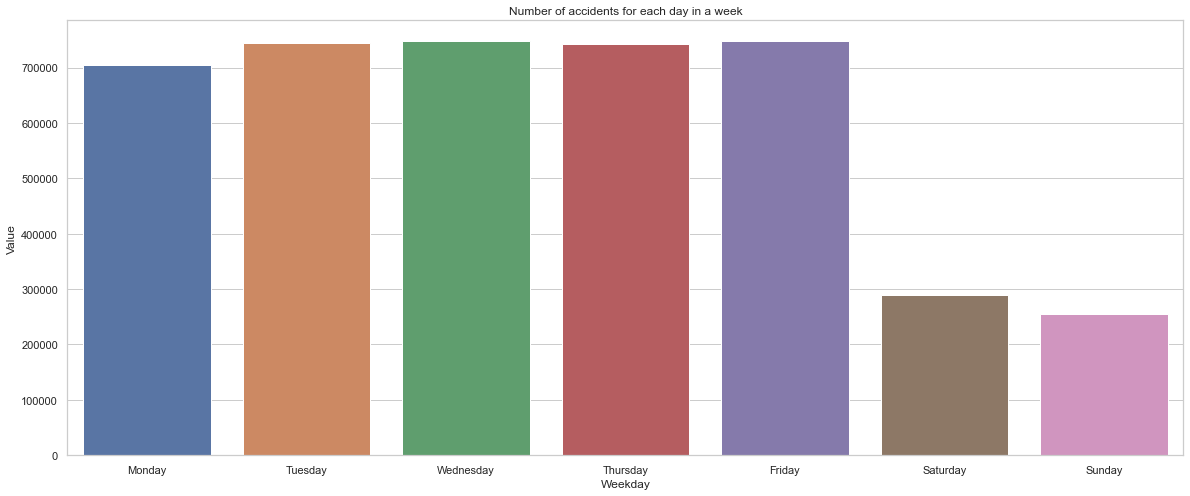

In [29]:
#checking the count of accidents every day in a week
counts = pd.to_datetime(accident_data['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each day in a week")
sns.barplot(counts.index, counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()


Text(0, 0.5, 'Severity')

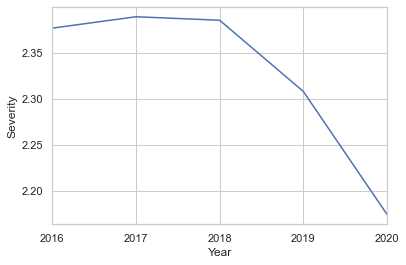

In [30]:
#checking the level of severity of accidents over the year
accident_data_time['Year'] = accident_data_time['Start_Time'].dt.year
accident_data_time['Severity']=accident_data['Severity']
severityByYear = accident_data_time.groupby('Year')['Severity'].mean().plot(kind = 'line')
plt.xticks([2016,2017,2018,2019,2020])
plt.ylabel("Severity")

In [31]:

accident_data_time['Start_hour'] = accident_data_time['Start_Time'].dt.hour
hours = accident_data_time.groupby(['Start_hour']).count()

hours

ID  Start_Time    Year   Month    Week  Severity
Start_hour                                                      
0            59775       59775   59775   59775   59775     59775
1            55599       55599   55599   55599   55599     55599
2            51363       51363   51363   51363   51363     51363
3            44247       44247   44247   44247   44247     44247
4            89819       89819   89819   89819   89819     89819
5           122520      122520  122520  122520  122520    122520
6           228882      228882  228882  228882  228882    228882
7           349950      349950  349950  349950  349950    349950
8           358432      358432  358432  358432  358432    358432
9           221546      221546  221546  221546  221546    221546
10          202997      202997  202997  202997  202997    202997
11          202911      202911  202911  202911  202911    202911
12          188991      188991  188991  188991  188991    188991
13          205848      205848  205848  205848  205848    205848
14          216507      216507  216507  216507  216507    216507
15          250801      250801  250801  250801  250801    250801
16          294589      294589  294589  294589  294589    294589
17          301116      301116  301116  301116  301116    301116
18          237053      237053  237053  237053  237053    237053
19          166967      166967  166967  166967  166967    166967
20          126256      126256  126256  126256  126256    126256
21          100519      100519  100519  100519  100519    100519
22           90153       90153   90153   90153   90153     90153
23           65700       65700   65700   65700   65700     65700

Text(0.5, 1.0, 'Time when accident usually oocur in the US')

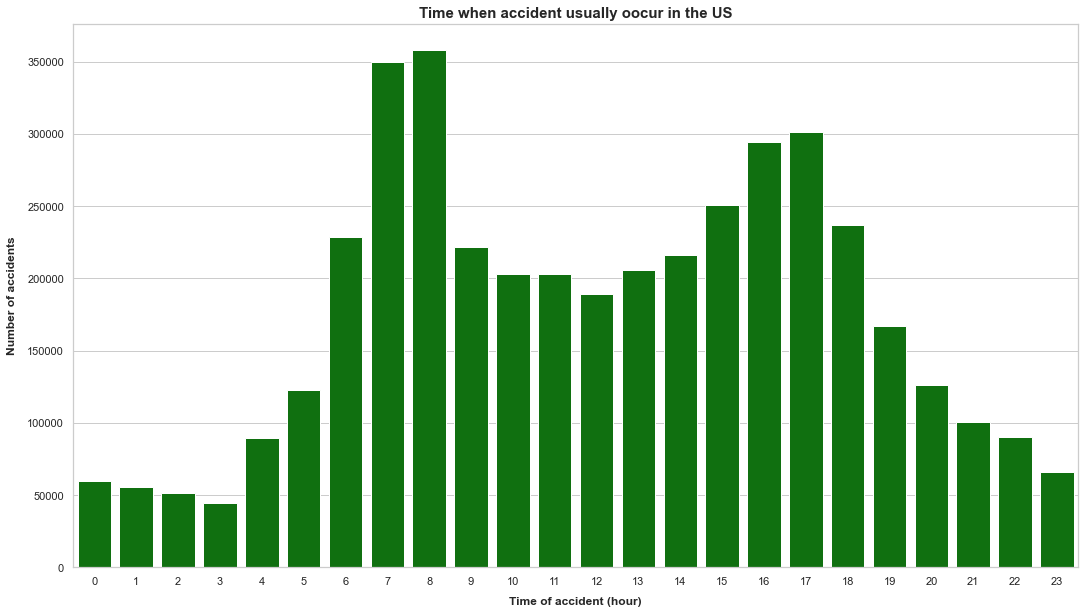

In [32]:
#plotting the graph to check the time of the accidents
f, ax = plt.subplots(figsize = (18, 10))
sns.barplot(x = hours.index, y = 'Start_Time', data = hours, color='green')
plt.xlabel('Time of accident (hour)', labelpad = 10, fontsize=12, weight='bold')
plt.ylabel('Number of accidents', labelpad = 10, fontsize=12, weight='bold')
plt.title('Time when accident usually oocur in the US', fontsize = 15, weight = 'bold')


As We Can See Most Accident Occurs in the Morning Between 6am to 10 Am. As people leave to their Work in hurry.

Next Highest Percentage is between 3pm to 6pm

Text(0.5, 1.0, 'Severity of accidents')

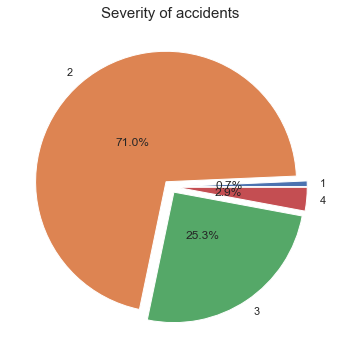

In [33]:
#checking the severity percent of the accidents
severityGrouping = accident_data.groupby('Severity').size()
#Using matplotlib
pie, ax = plt.subplots(figsize=[8,6])
labels = severityGrouping.keys()
plt.pie(x=severityGrouping, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.4)
plt.title("Severity of accidents", fontsize=15)

In [34]:
import plotly.graph_objects as go
import matplotlib.ticker as ticke
%matplotlib inline

In [35]:
#Plotting the geoloaction graph for  analyzing the accident counts all over the USA
accident_data_st_ct = pd.value_counts(accident_data['State'])

fig = go.Figure(data=go.Choropleth(
    locations=accident_data_st_ct.index,
    z = accident_data_st_ct.values.astype(float),  
    locationmode = 'USA-states',   
    colorscale = 'darkmint',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa',
)

fig.show()


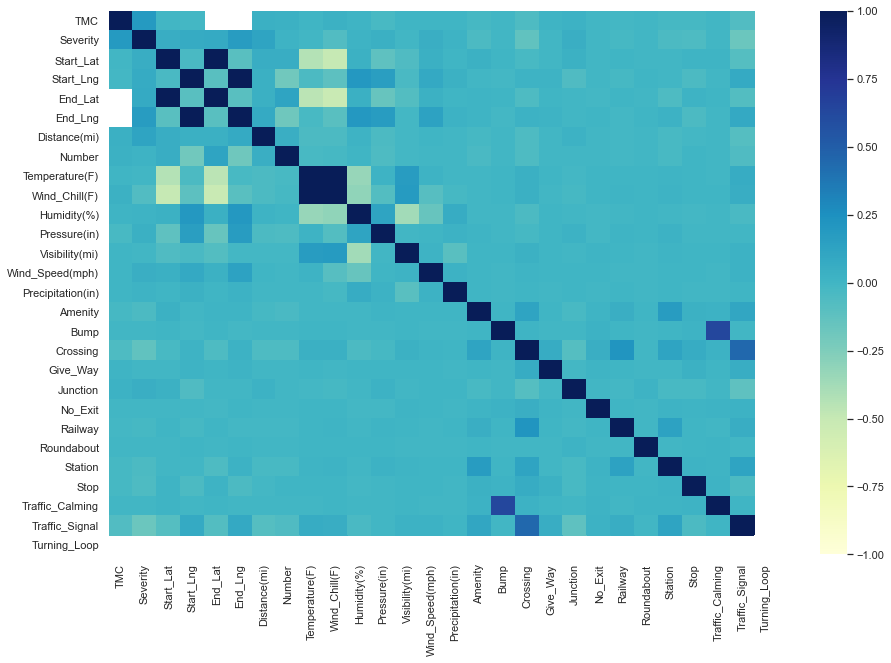

In [36]:
#Correlation matrix to analyze the replationship between attributes usingheatmap
correlation_matrix = accident_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap="YlGnBu")
plt.gca().patch.set(hatch="accident_data")
plt.show()

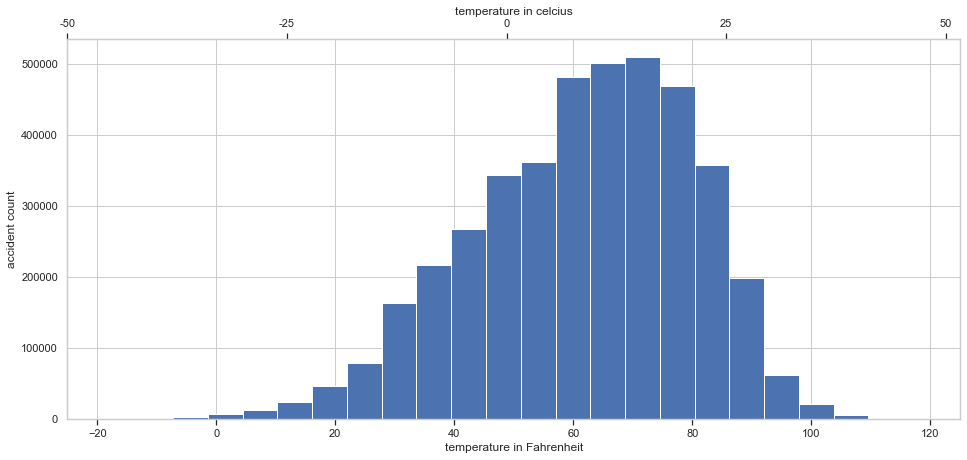

In [37]:
# checking the temperature in which accidents happened
temperature_ = accident_data['Temperature(F)'].values
bin_count = 50


fig, a1=plt.subplots(figsize=(16,7))
# histogram 
n, bin_s, sec = a1.hist(temperature_, bin_count, density=0) 

a1.set_xlabel("temperature in Fahrenheit")
a1.set_ylabel('accident count')
a1.set_xlim(-25, 125) 
a2 = a1.twiny()
a2.set_xlabel("temperature in celcius")
a2.set_xlim(a1.get_xlim())
a2.set_xticks([-58, -13, 32, 77, 122])
a2.set_xticklabels(['-50', '-25', '0','25', '50'])
plt.grid()
plt.show()

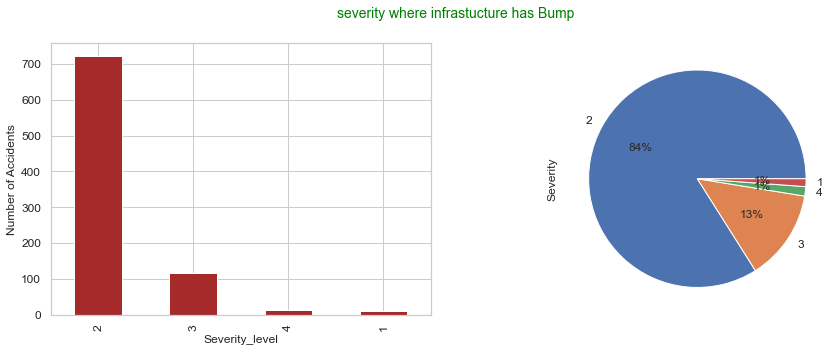

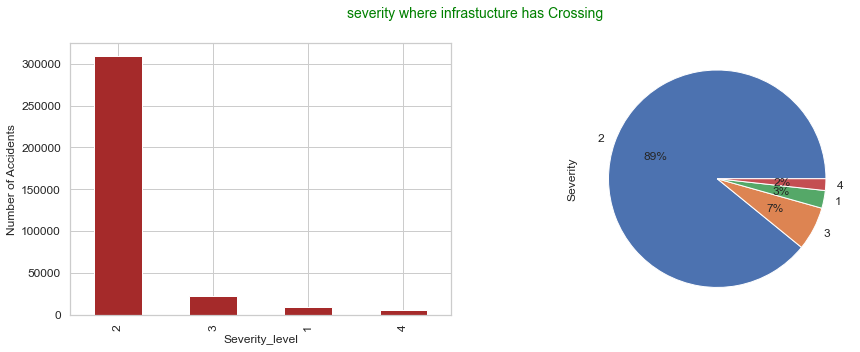

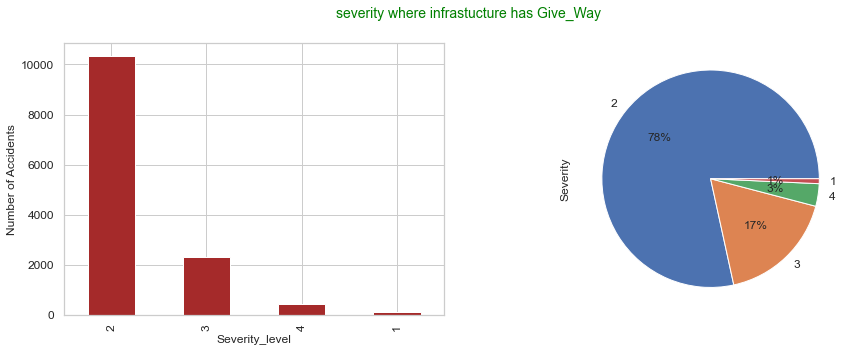

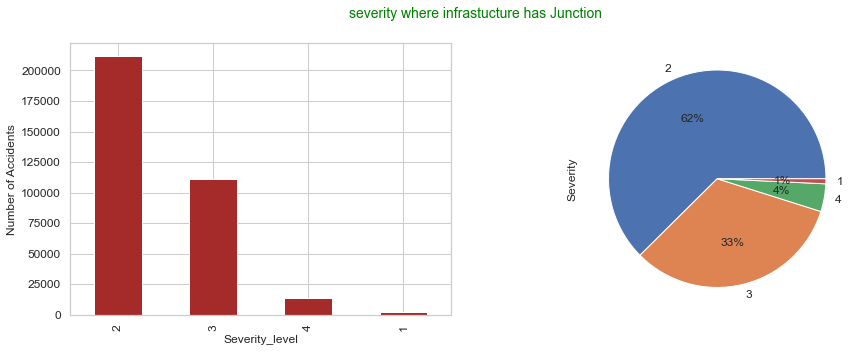

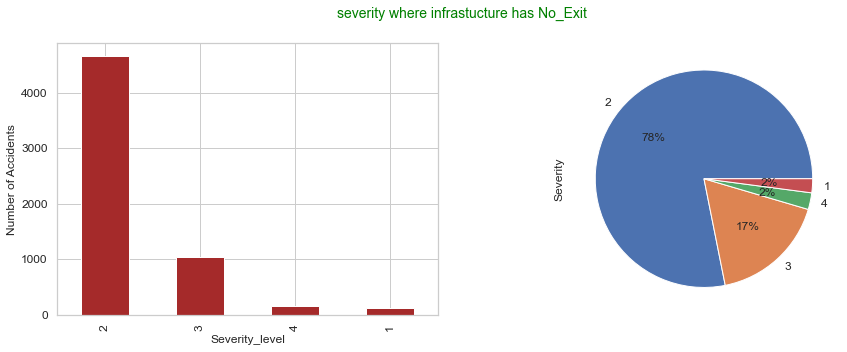

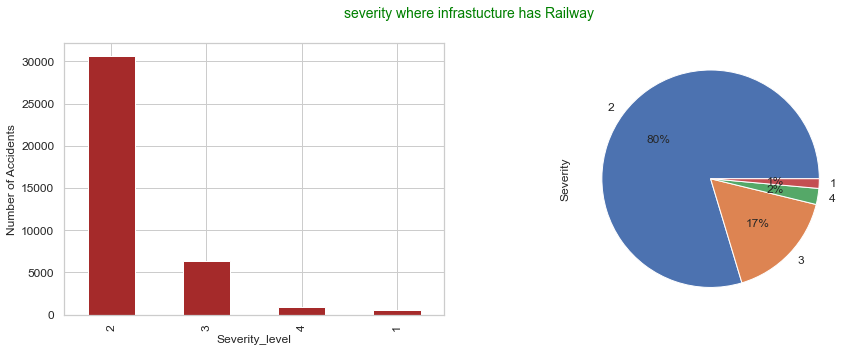

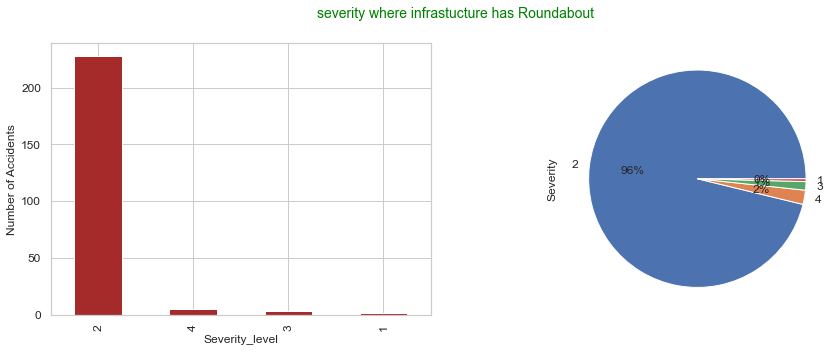

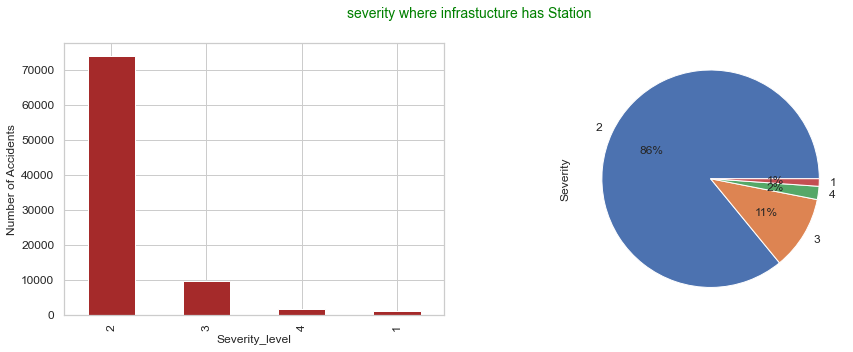

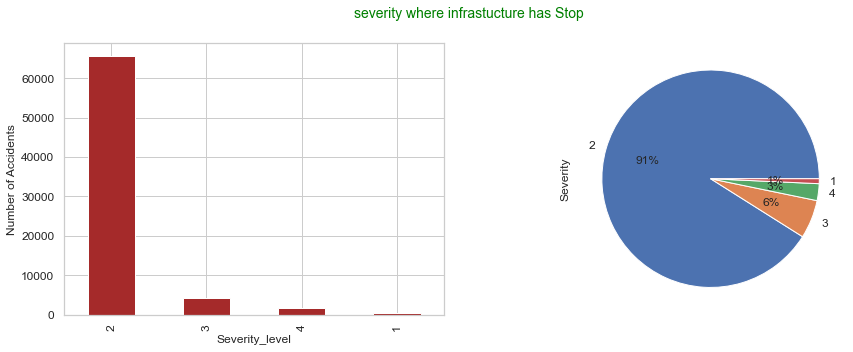

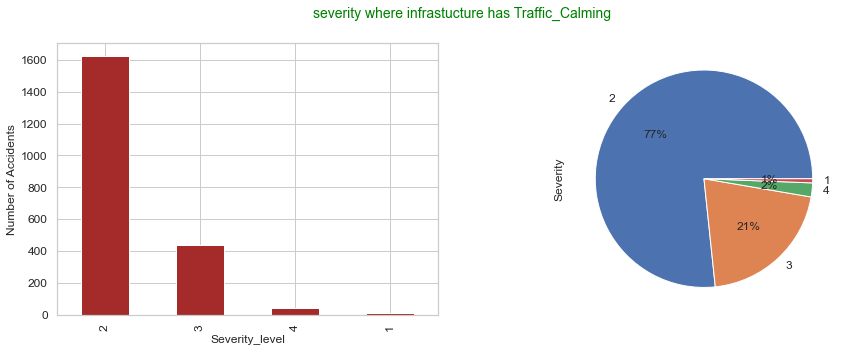

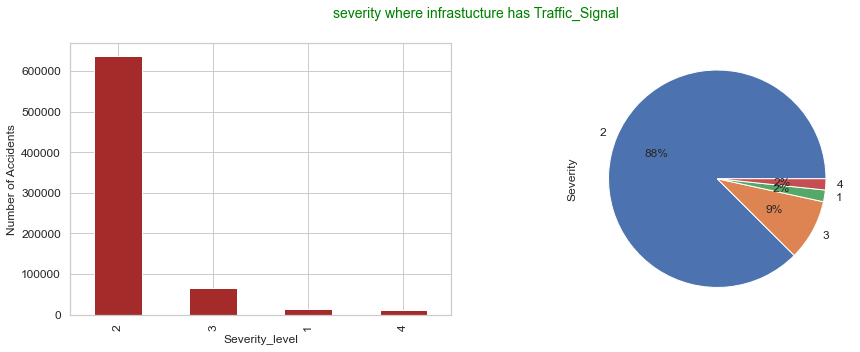

In [38]:
#checnking infrastrure around the place where incident happend
for a in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    
    if (accident_data[a] == True).sum() > 0:
        plt.subplots(1,2,figsize=(15,5))
        plt.xticks(fontsize=8) 
        plt.suptitle('severity where infrastucture has ' + a,fontsize=14, color="green")
        plt.subplot(1,2,1)
        accident_data.loc[accident_data[a] == True]['Severity'].value_counts().plot.bar(width=0.5,color='brown',align='center',linewidth=1)
        plt.xlabel('Severity_level',fontsize=12)
        plt.ylabel('Number of Accidents',fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.subplot(1,2,2)
        accident_data.loc[accident_data[a] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=12)